In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,root_mean_squared_error
from sklearn.svm import SVC
from sklearn.tree import export_text,plot_tree
import pickle


In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data cleaning and preparation

In [3]:
df.shape

(1470, 35)

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [6]:
df.isnull().sum().loc[lambda x : x>0].shape[0]

0

In [7]:
df.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [9]:
df.duplicated().any()

np.False_

In [10]:
df =  df.drop(['employeecount' , 'standardhours' , 'over18','employeenumber'], axis=1)

In [11]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager'],
      dtype='object')

In [12]:
df.nunique().value_counts()

4       6
2       4
3       3
5       2
886     1
43      1
29      1
6       1
71      1
9       1
1349    1
1427    1
10      1
15      1
40      1
7       1
37      1
19      1
16      1
18      1
Name: count, dtype: int64

In [13]:
category_data = df.select_dtypes(include=['object']).columns
numerical_data = df.select_dtypes(exclude=['object']).columns
category_data, numerical_data

(Index(['attrition', 'businesstravel', 'department', 'educationfield', 'gender',
        'jobrole', 'maritalstatus', 'overtime'],
       dtype='object'),
 Index(['age', 'dailyrate', 'distancefromhome', 'education',
        'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel',
        'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
        'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
        'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
        'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
        'yearssincelastpromotion', 'yearswithcurrmanager'],
       dtype='object'))

In [14]:
def value_counts(dataframe, features):
    for feature in features:
        print(f"Value counts for {feature}:")
        print(dataframe[feature].value_counts())
        print("\n")

In [15]:
print(value_counts(df, category_data))

Value counts for attrition:
attrition
No     1233
Yes     237
Name: count, dtype: int64


Value counts for businesstravel:
businesstravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Value counts for department:
department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


Value counts for educationfield:
educationfield
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Value counts for gender:
gender
Male      882
Female    588
Name: count, dtype: int64


Value counts for jobrole:
jobrole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director        

In [16]:
df.department.value_counts()

department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [17]:
df.education.value_counts()

education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [18]:
df["education"] = df["education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})

In [19]:
df.environmentsatisfaction.value_counts()

environmentsatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [20]:
df["environmentsatisfaction"] = df["environmentsatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [21]:
df.jobinvolvement.value_counts()

jobinvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [22]:
df["jobinvolvement"] = df["jobinvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [23]:
df.joblevel.value_counts()

joblevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [24]:
df["joblevel"] = df["joblevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",
                                         5:"Executive Level"})

In [25]:
df.jobsatisfaction.value_counts()

jobsatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [26]:
df["jobsatisfaction"] = df["jobsatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [27]:
df["performancerating"] = df["performancerating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})

In [28]:
df.relationshipsatisfaction.value_counts()

relationshipsatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [29]:
df["relationshipsatisfaction"] = df["relationshipsatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [30]:
df["worklifebalance"] = df["worklifebalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [31]:
category_data = df.select_dtypes(include=['object']).columns
numerical_data = df.select_dtypes(exclude=['object']).columns

In [32]:
category_data, numerical_data

(Index(['attrition', 'businesstravel', 'department', 'education',
        'educationfield', 'environmentsatisfaction', 'gender', 'jobinvolvement',
        'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'overtime',
        'performancerating', 'relationshipsatisfaction', 'worklifebalance'],
       dtype='object'),
 Index(['age', 'dailyrate', 'distancefromhome', 'hourlyrate', 'monthlyincome',
        'monthlyrate', 'numcompaniesworked', 'percentsalaryhike',
        'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
        'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
        'yearswithcurrmanager'],
       dtype='object'))

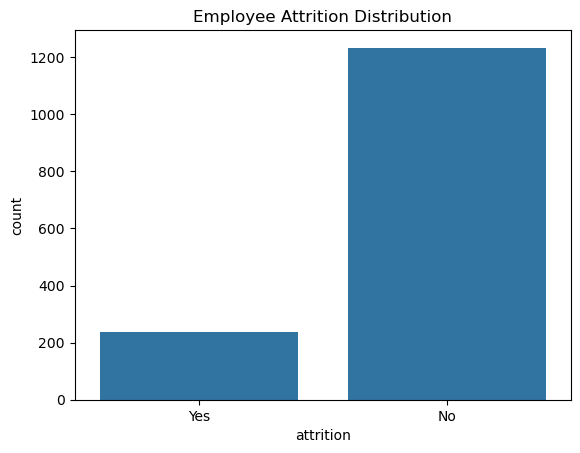

attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [33]:
sns.countplot(x='attrition', data=df)
plt.title('Employee Attrition Distribution')
plt.show()

df['attrition'].value_counts(normalize=True)

In [34]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


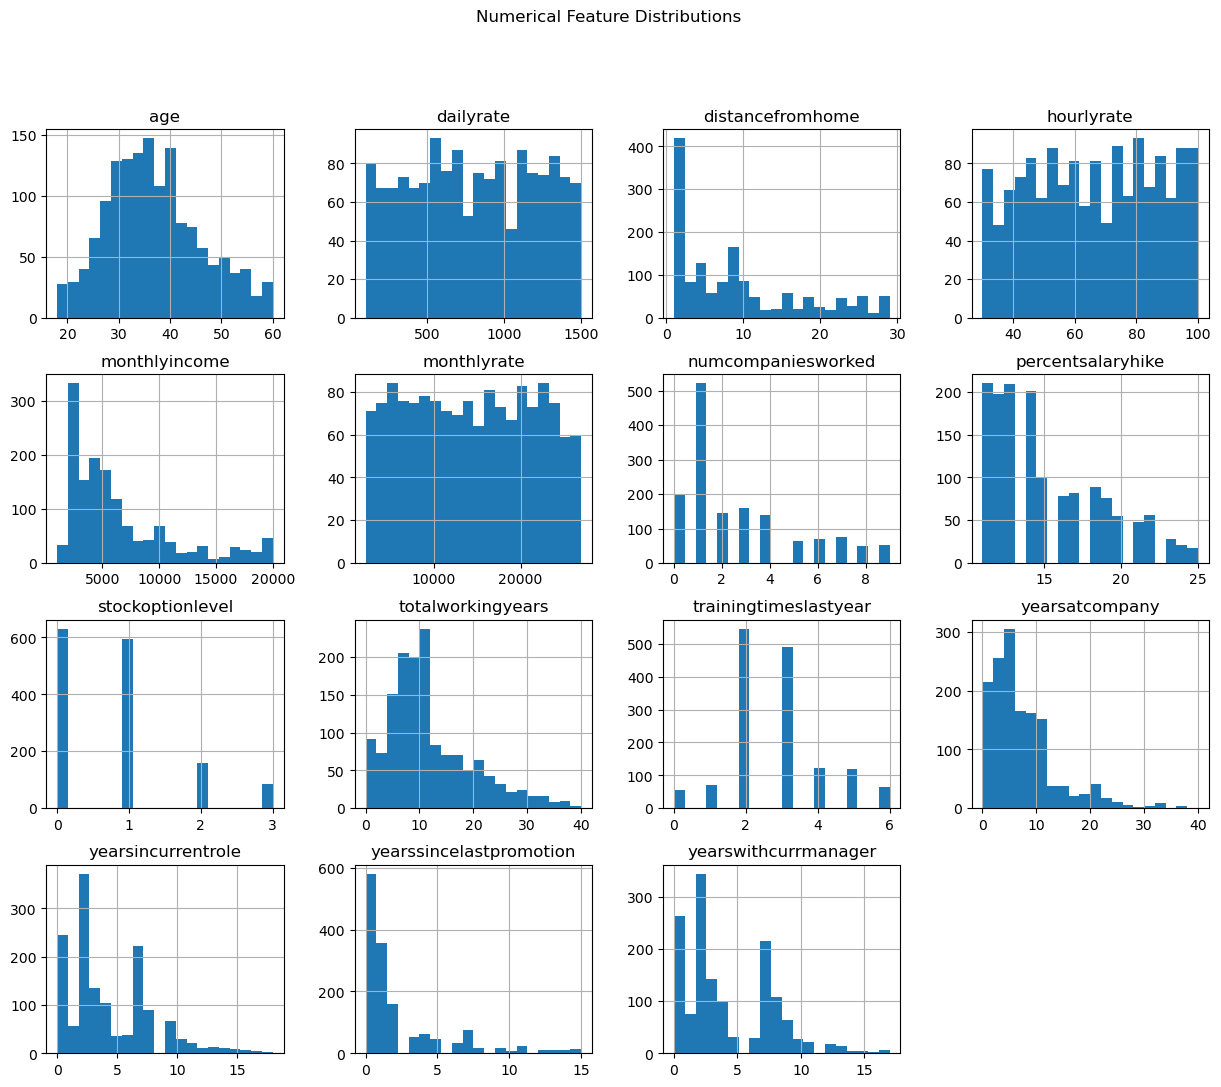

In [35]:
df[numerical_data].hist(figsize=(15,12), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()

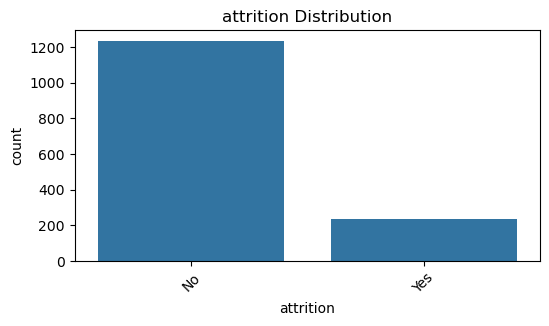

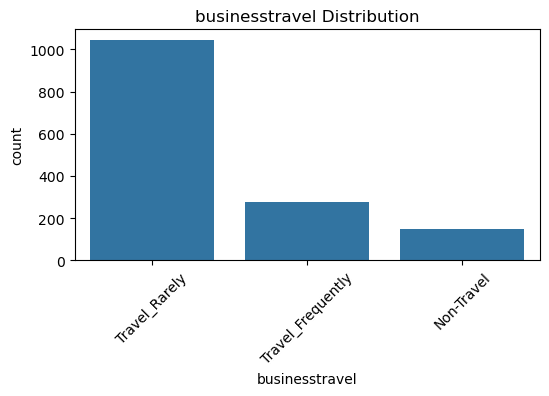

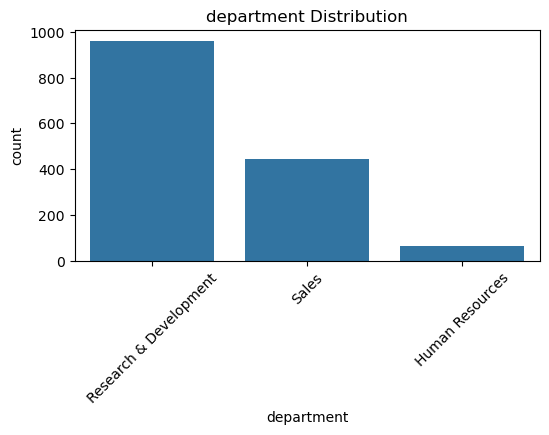

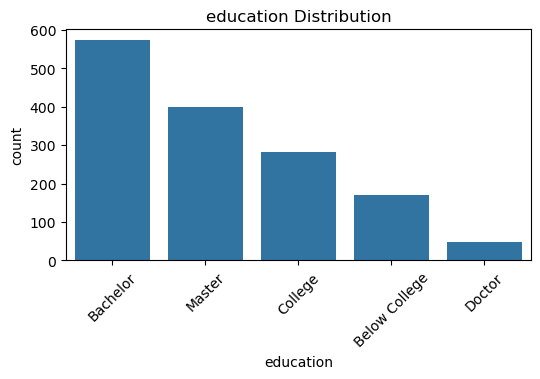

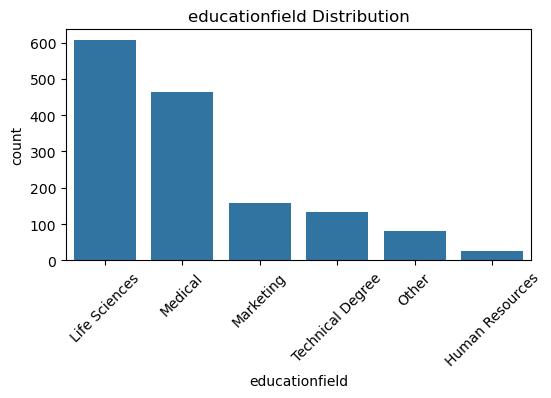

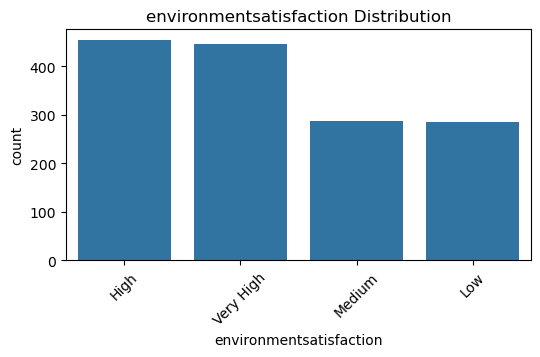

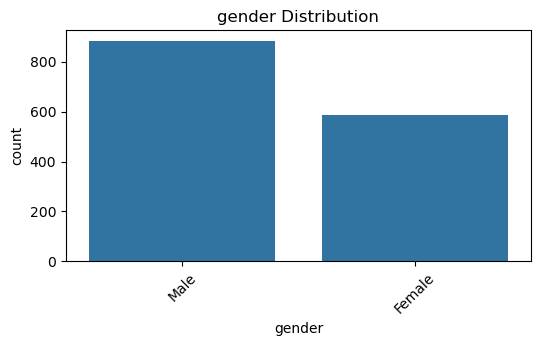

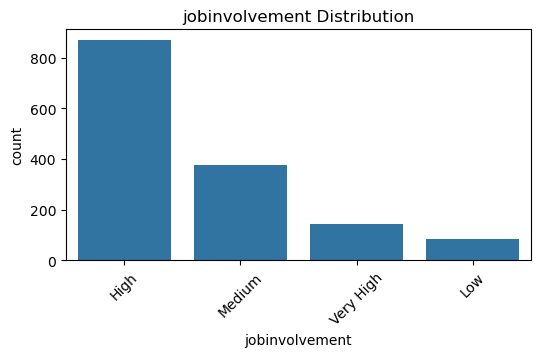

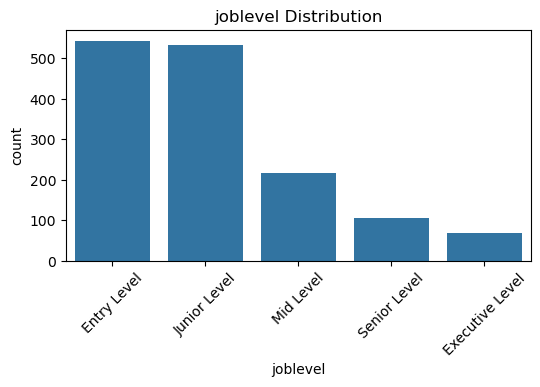

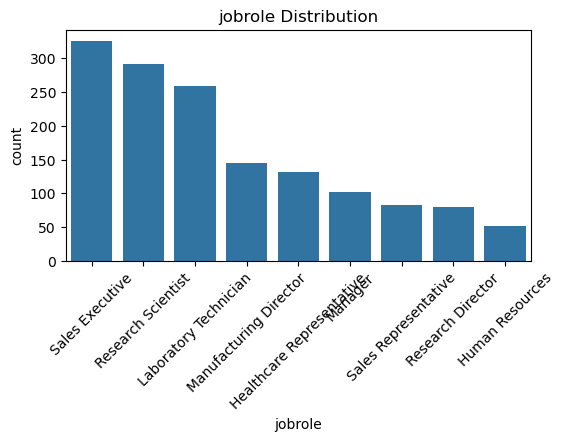

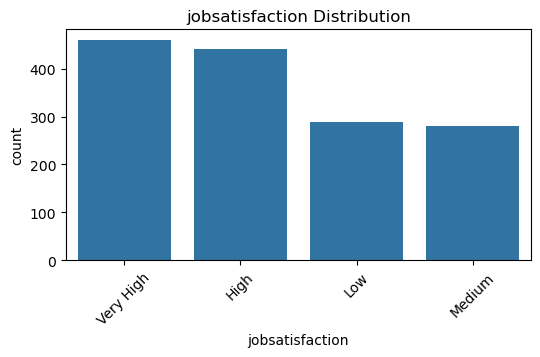

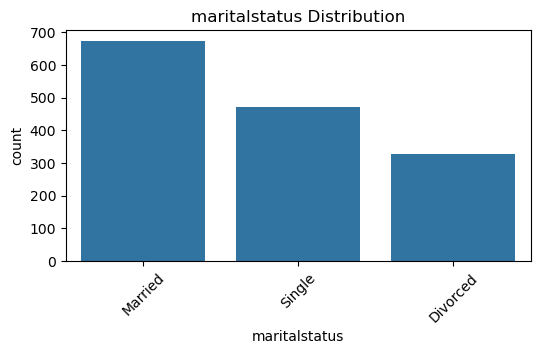

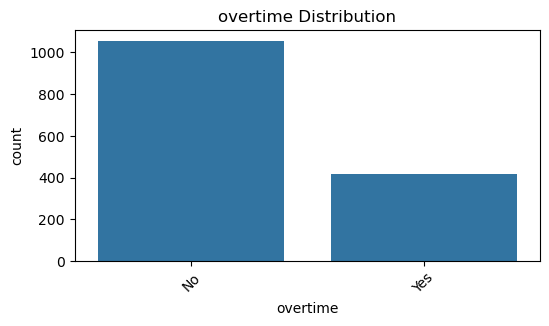

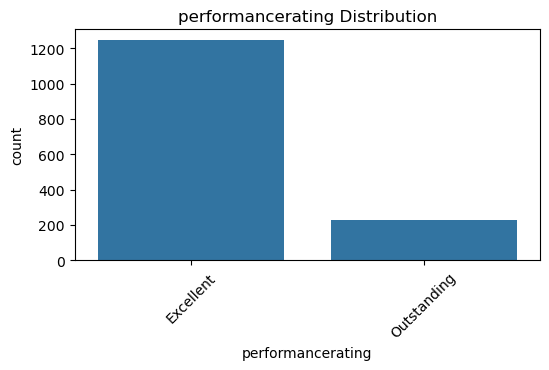

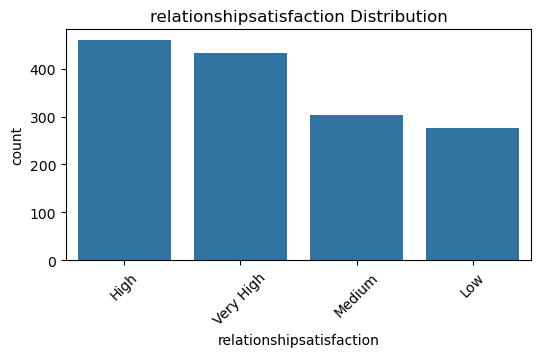

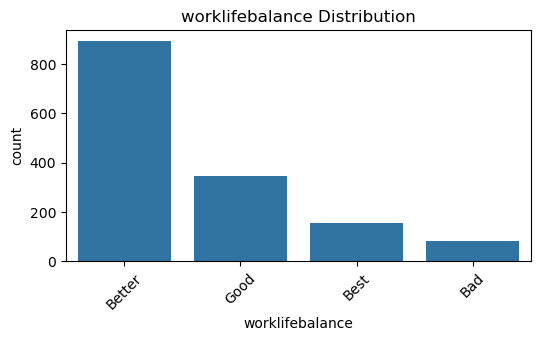

In [36]:
for col in category_data:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

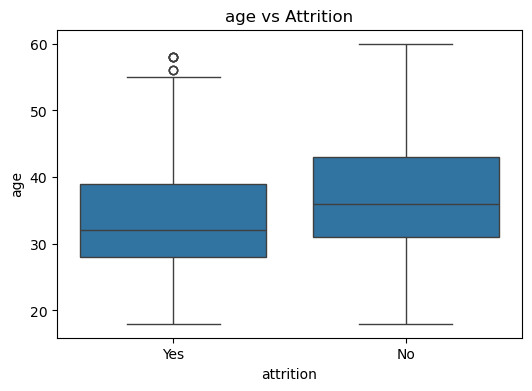

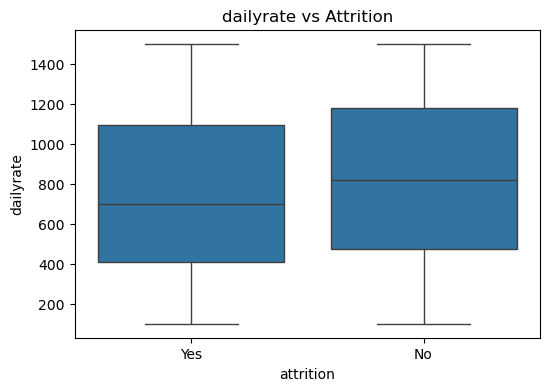

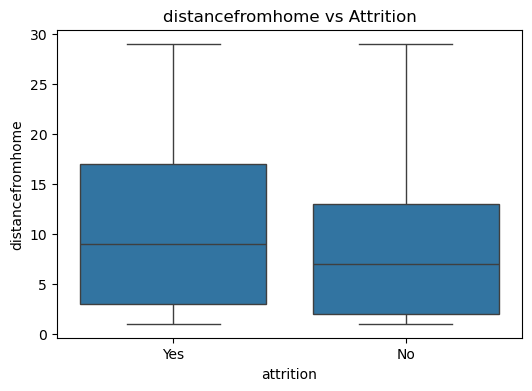

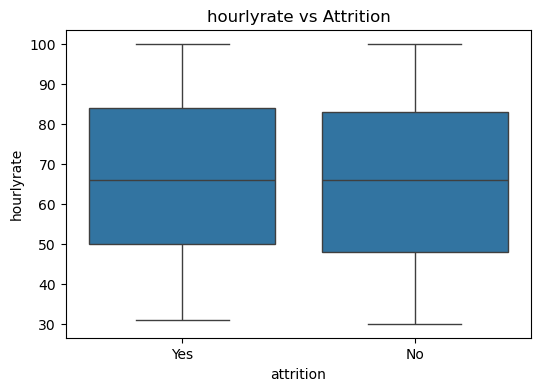

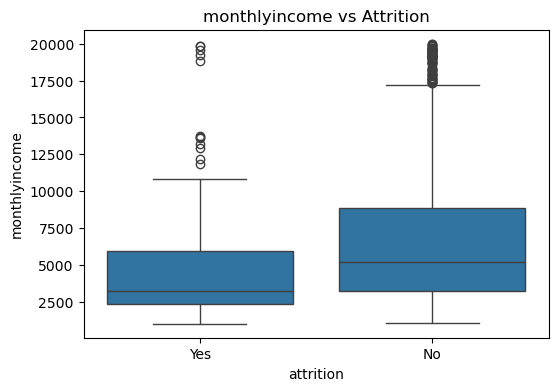

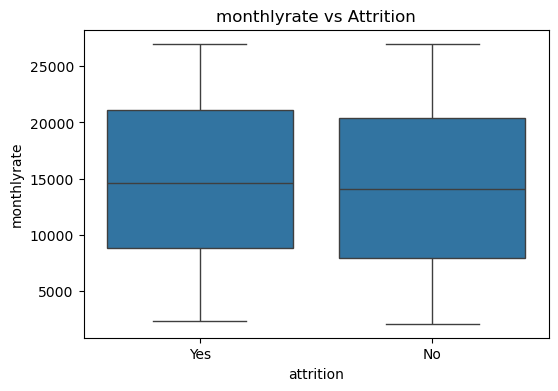

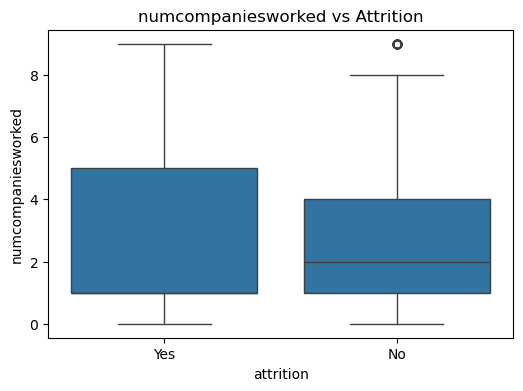

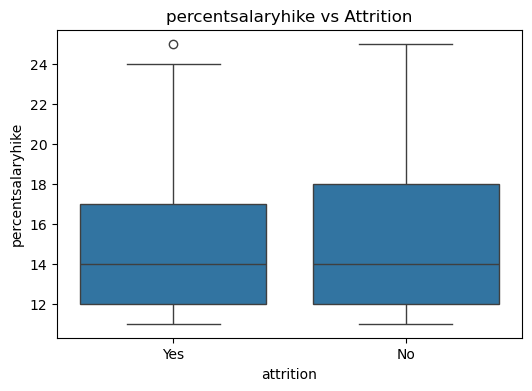

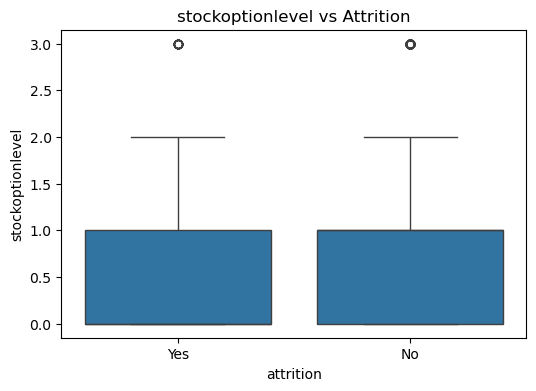

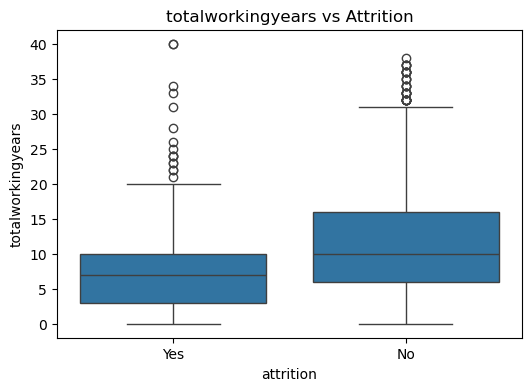

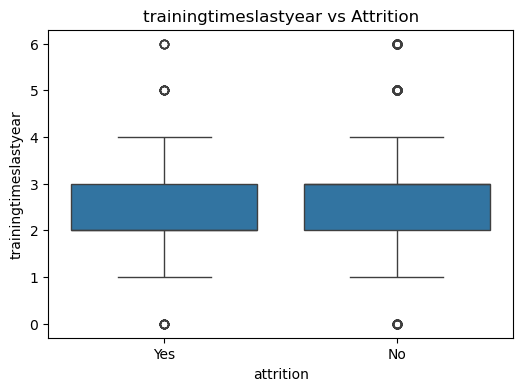

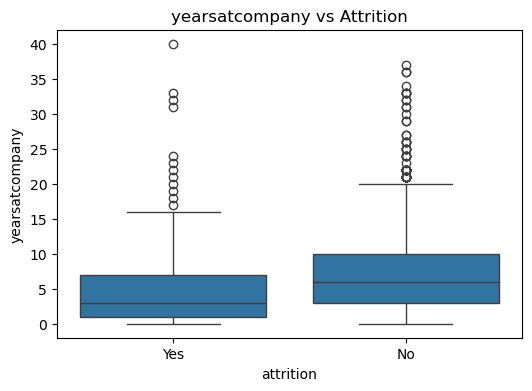

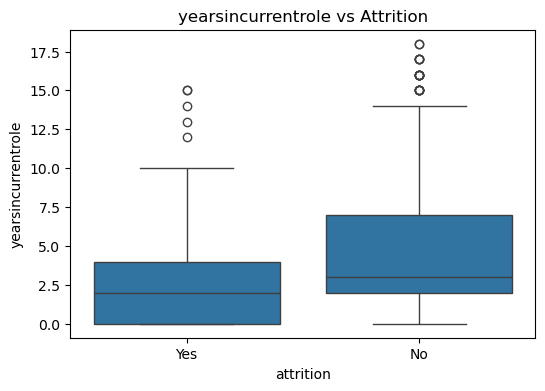

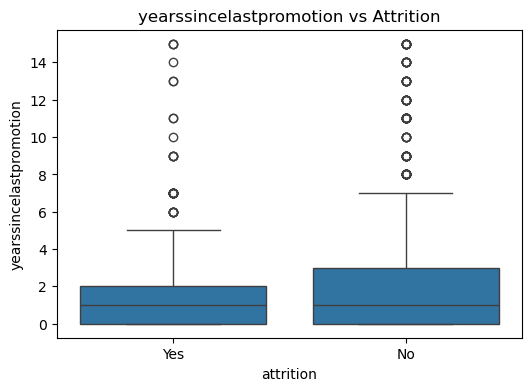

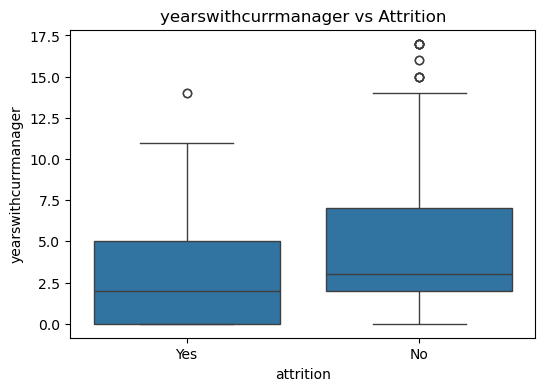

In [37]:
for col in numerical_data:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='attrition', y=col, data=df)
    plt.title(f"{col} vs Attrition")
    plt.show()

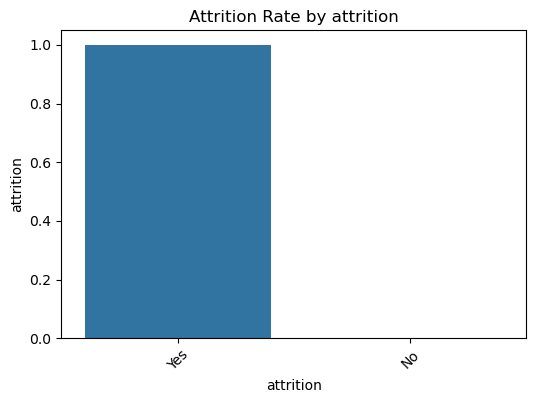

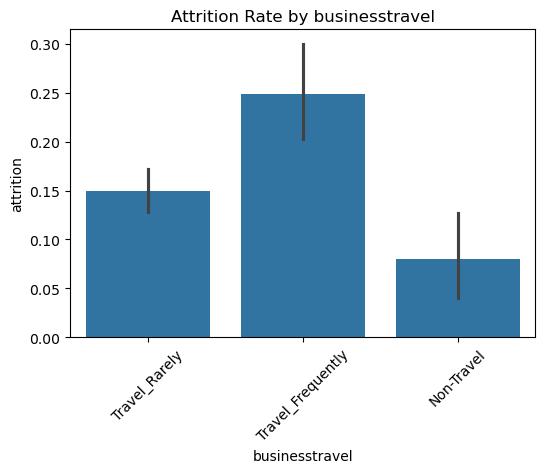

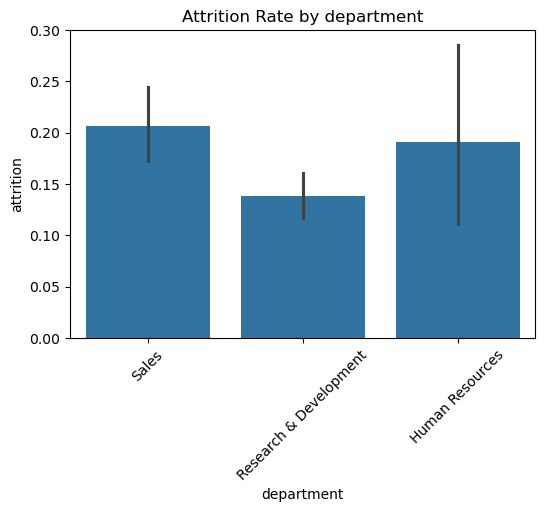

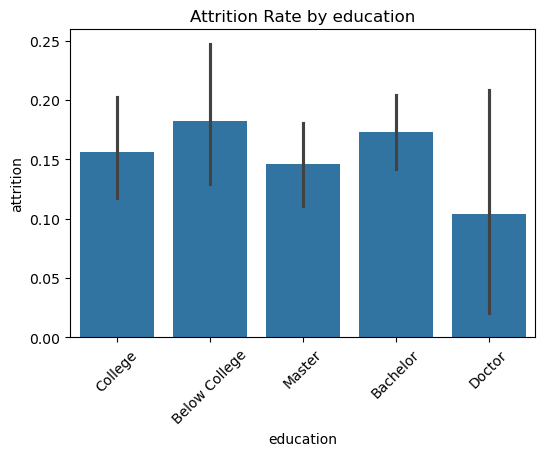

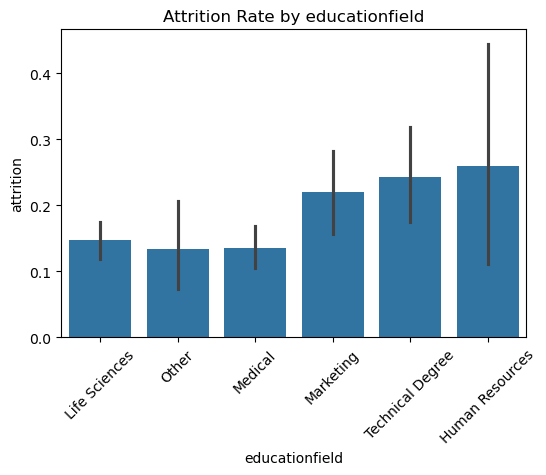

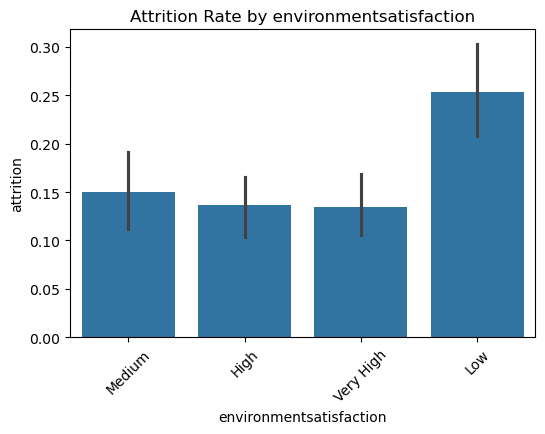

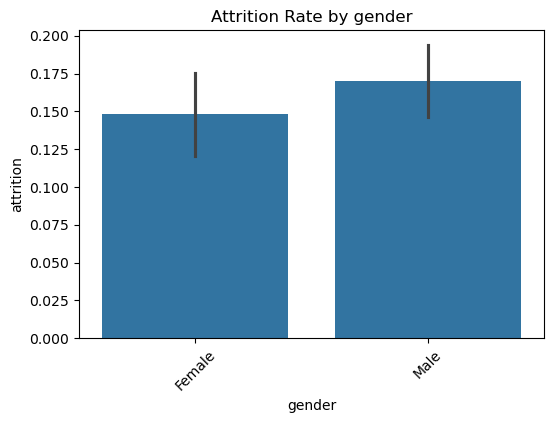

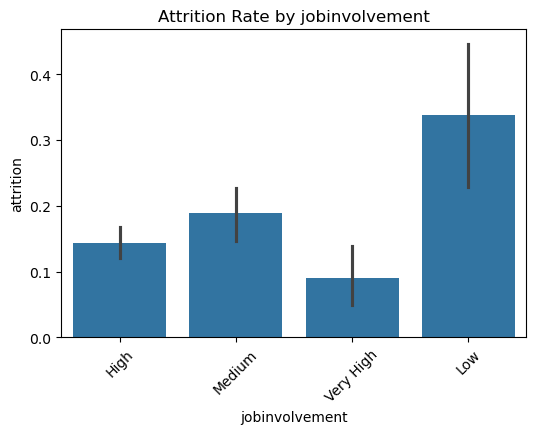

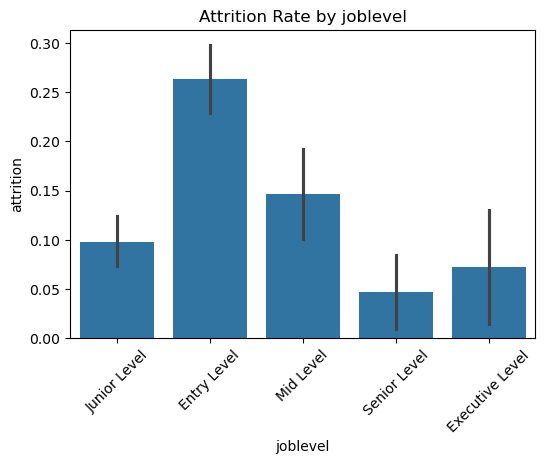

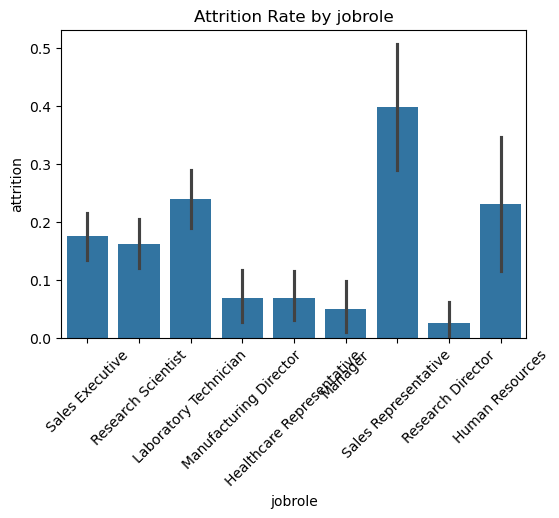

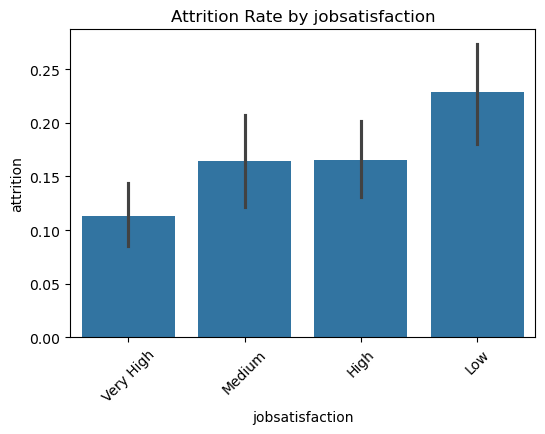

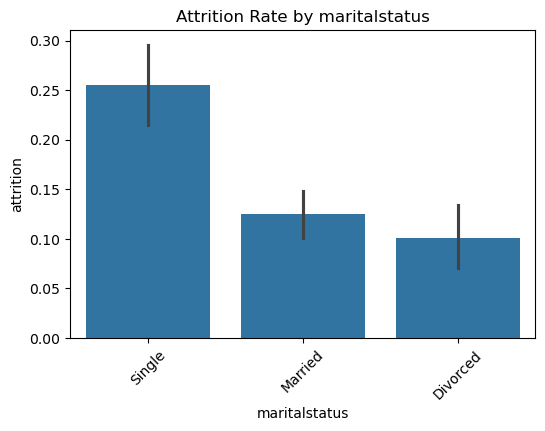

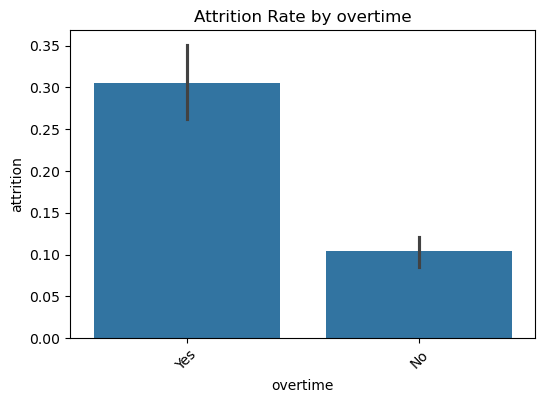

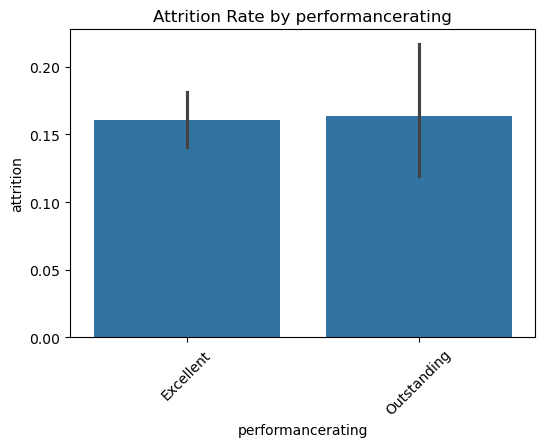

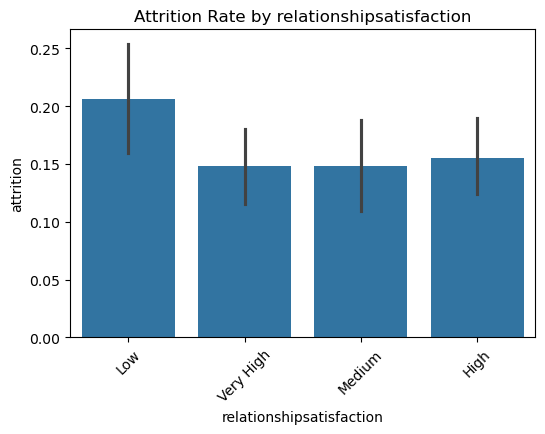

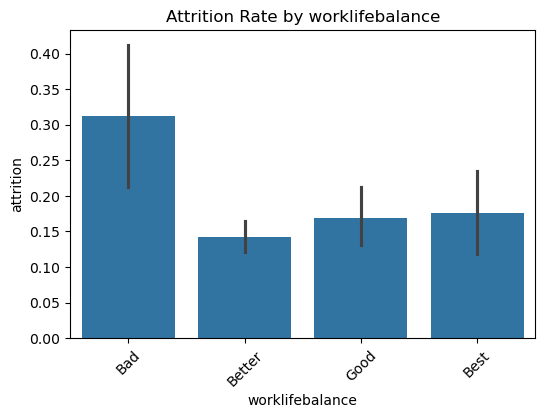

In [38]:

for col in category_data:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y=df['attrition'].apply(lambda x: 1 if x=='Yes' else 0), data=df)
    plt.title(f"Attrition Rate by {col}")
    plt.xticks(rotation=45)
    plt.show() 



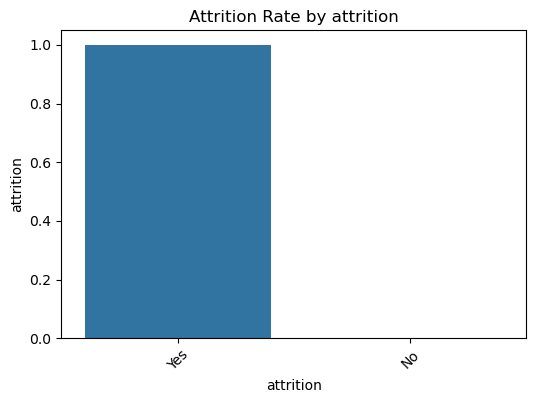

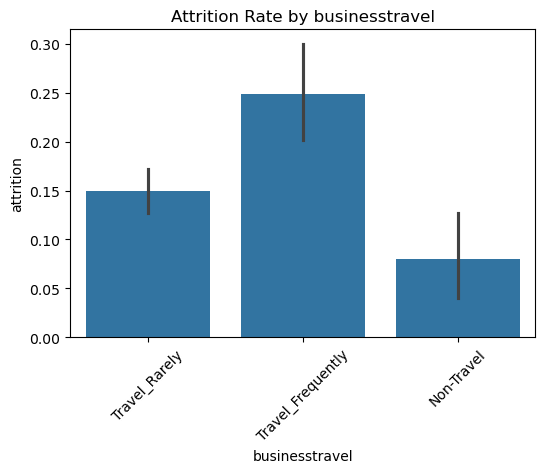

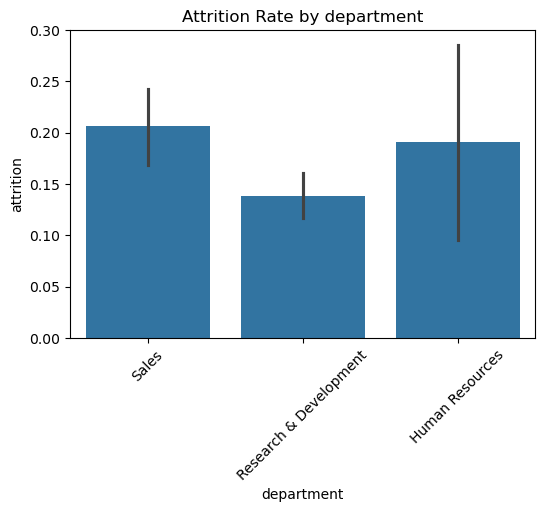

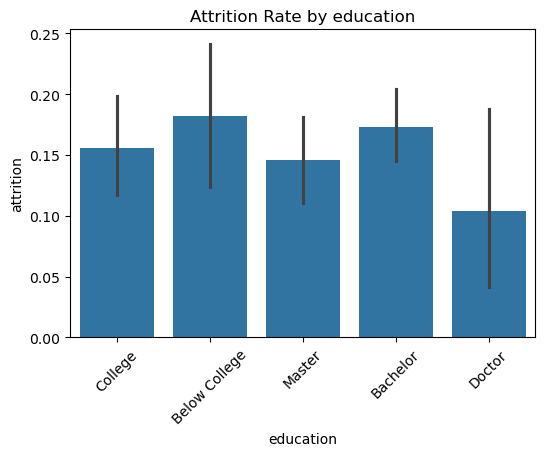

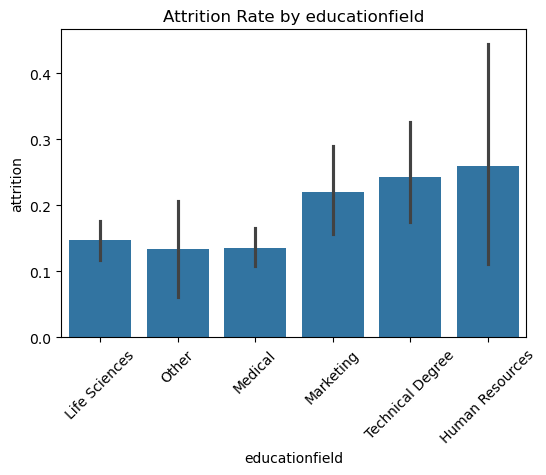

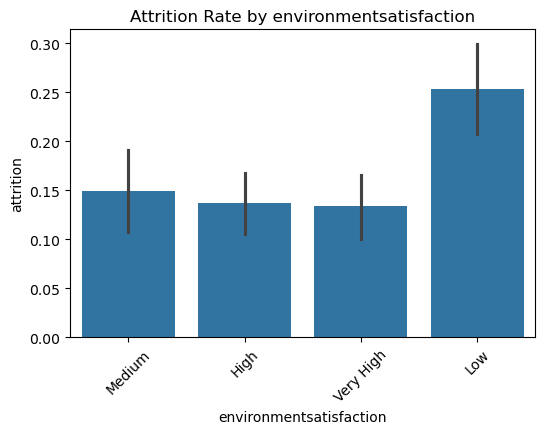

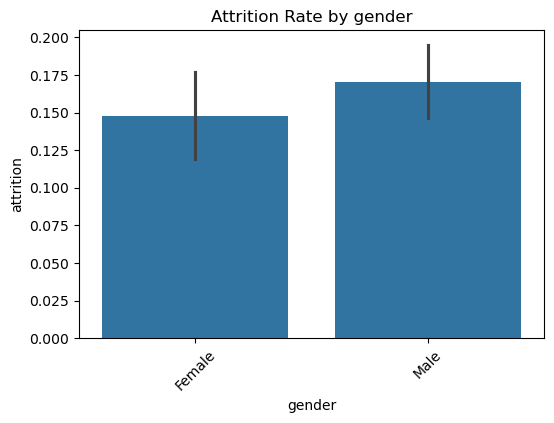

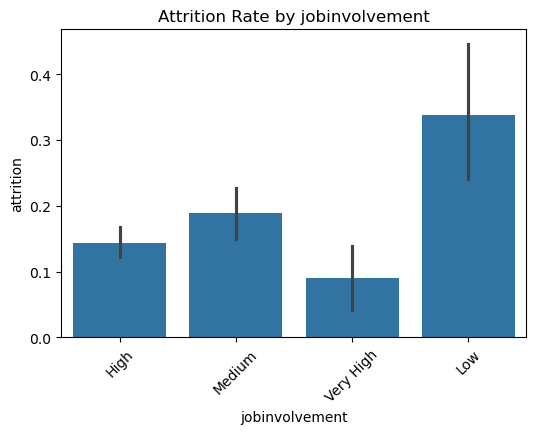

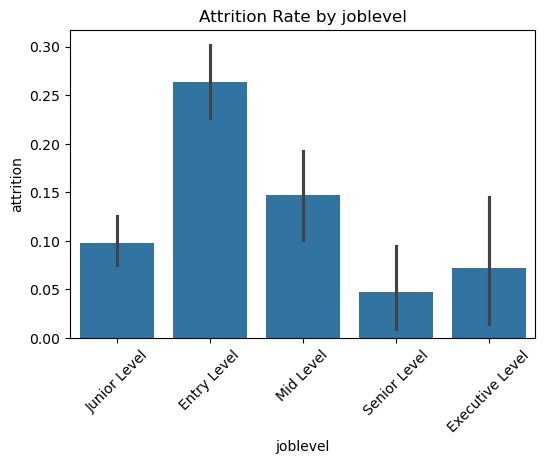

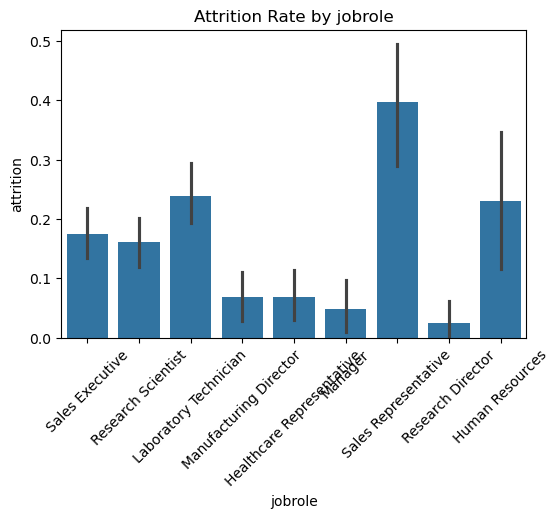

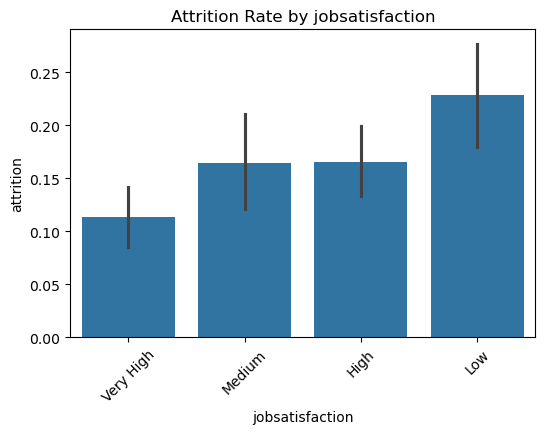

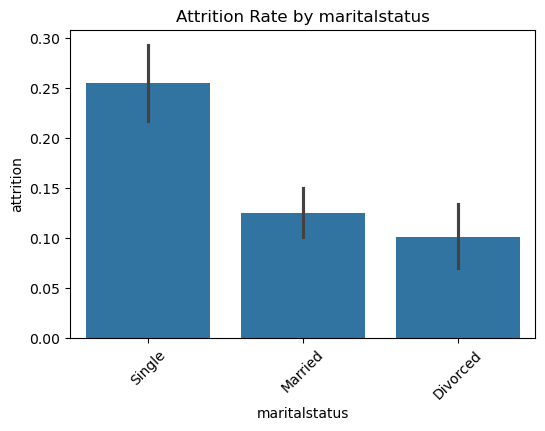

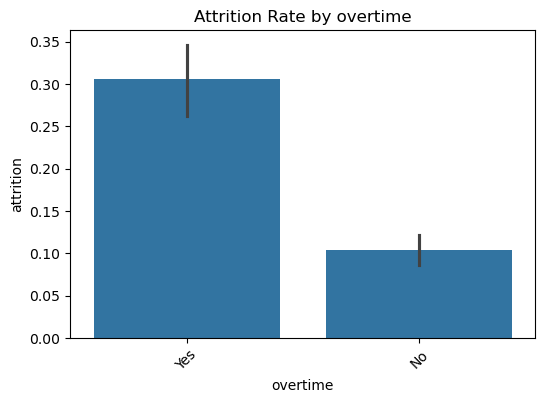

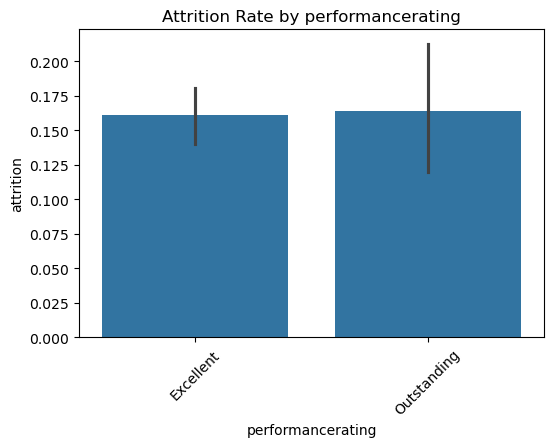

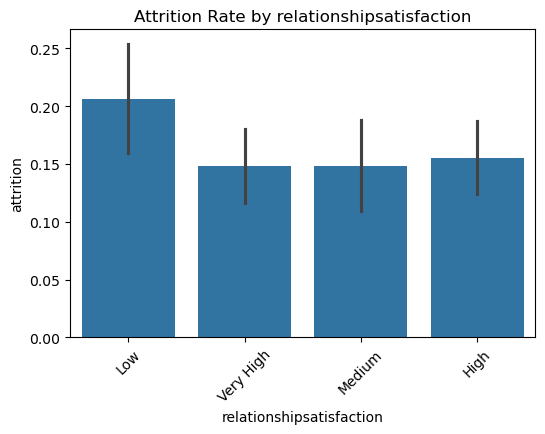

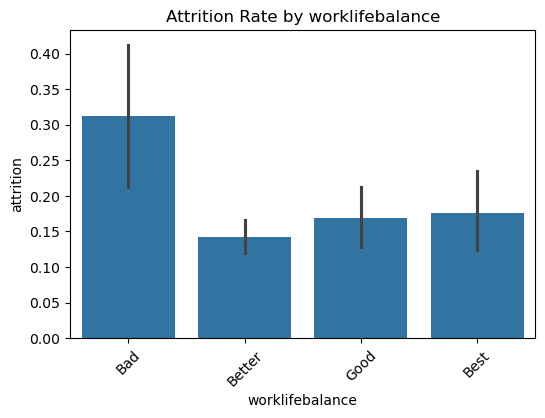

In [39]:
for col in category_data:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y=df['attrition'].apply(lambda x: 1 if x=='Yes' else 0), data=df)
    plt.title(f"Attrition Rate by {col}")
    plt.xticks(rotation=45)
    plt.show()


<Axes: >

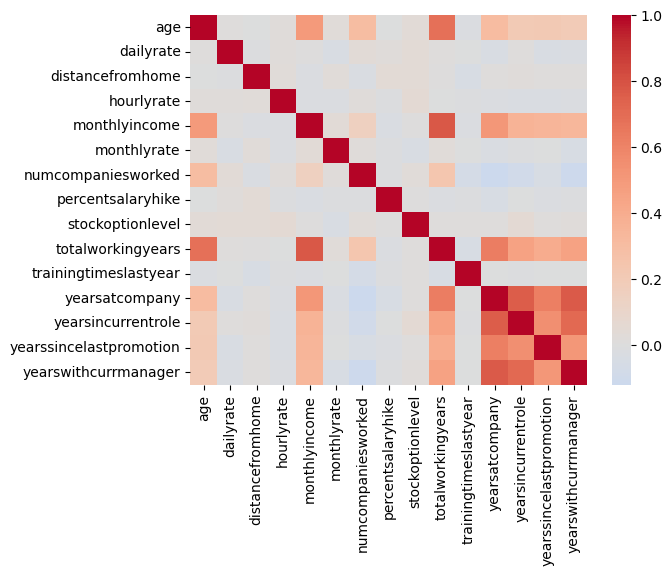

In [40]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0)

In [41]:
x = df.drop('attrition', axis=1)
y = df['attrition'].apply(lambda x: 1 if x=='Yes' else 0)

In [42]:
X_train, X_test,Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [43]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1176, 30), (294, 30), (1176,), (294,))

In [44]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [45]:
train_dicts = X_train.to_dict(orient='records')
test_dicts = X_test.to_dict(orient='records')

In [46]:
X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(test_dicts)

In [47]:
features = dv.get_feature_names_out()
features

array(['age', 'businesstravel=Non-Travel',
       'businesstravel=Travel_Frequently', 'businesstravel=Travel_Rarely',
       'dailyrate', 'department=Human Resources',
       'department=Research & Development', 'department=Sales',
       'distancefromhome', 'education=Bachelor',
       'education=Below College', 'education=College', 'education=Doctor',
       'education=Master', 'educationfield=Human Resources',
       'educationfield=Life Sciences', 'educationfield=Marketing',
       'educationfield=Medical', 'educationfield=Other',
       'educationfield=Technical Degree', 'environmentsatisfaction=High',
       'environmentsatisfaction=Low', 'environmentsatisfaction=Medium',
       'environmentsatisfaction=Very High', 'gender=Female',
       'gender=Male', 'hourlyrate', 'jobinvolvement=High',
       'jobinvolvement=Low', 'jobinvolvement=Medium',
       'jobinvolvement=Very High', 'joblevel=Entry Level',
       'joblevel=Executive Level', 'joblevel=Junior Level',
       'joblevel=Mid

In [48]:
final_result = {}

In [49]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# LOGISTIC REGRESSION

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train )
X_test_std = scaler.fit_transform(X_test)

In [52]:
lr = LogisticRegression(max_iter=1000, solver='liblinear',penalty='l1')
lr.fit(X_train_std, Y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [53]:
evaluate(lr, X_train_std, X_test_std, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[947  31]
 [ 92 106]]
ACCURACY SCORE:
0.8954
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.911453    0.773723  0.895408     0.842588      0.888264
recall       0.968303    0.535354  0.895408     0.751828      0.895408
f1-score     0.939018    0.632836  0.895408     0.785927      0.887467
support    978.000000  198.000000  0.895408  1176.000000   1176.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[237  18]
 [ 20  19]]
ACCURACY SCORE:
0.8707
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.922179   0.513514  0.870748    0.717846      0.867968
recall       0.929412   0.487179  0.870748    0.708296      0.870748
f1-score     0.925781   0.500000  0.870748    0.712891      0.869300
support    255.000000  39.000000  0.870748  294.000000    294.000000


In [54]:
final_result = {
    'Logistic Regression': {
        'Train': roc_auc_score(Y_train, lr.predict(X_train)),
        'Test': roc_auc_score(Y_test, lr.predict(X_test)),
    },
}

# Randomforestclassifier

In [55]:
rf = RandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, random_state=42)

In [56]:
evaluate(rf, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[978   0]
 [  0 198]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    978.0  198.0       1.0     1176.0        1176.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[251   4]
 [ 33   6]]
ACCURACY SCORE:
0.8741
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.883803   0.600000   0.87415    0.741901      0.846156
recall       0.984314   0.153846   0.87415    0.569080      0.874150
f1-score     0.931354   0.244898   0.87415    0.588126      0.840294
support    255.000000  39.000000   0.87415  294.000000    294.000000


In [57]:
parameter = dict(
    n_estimators= [50,100, 150,200,250,300,500], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15,20,25, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

In [58]:
rf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf, param_grid=parameter, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, Y_train)

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits


c:\Users\Ayush\anaconda3\envs\ds_genai\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5040 fits failed out of a total of 10080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3644 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ayush\anaconda3\envs\ds_genai\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ayush\anaconda3\envs\ds_genai\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Ayush\anaconda3\envs\ds_genai\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_c

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 5, 10, 15, 20, 25, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 500]},
             scoring='roc_auc', verbose=1)

In [59]:
rf = RandomForestClassifier(**search.best_params_, random_state=42)
rf.fit(X_train, Y_train)
evaluate(rf, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[978   0]
 [ 82 116]]
ACCURACY SCORE:
0.9303
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.922642    1.000000  0.930272     0.961321      0.935666
recall       1.000000    0.585859  0.930272     0.792929      0.930272
f1-score     0.959764    0.738854  0.930272     0.849309      0.922570
support    978.000000  198.000000  0.930272  1176.000000   1176.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[252   3]
 [ 34   5]]
ACCURACY SCORE:
0.8741
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.881119   0.625000   0.87415    0.753059      0.847144
recall       0.988235   0.128205   0.87415    0.558220      0.874150
f1-score     0.931608   0.212766   0.87415    0.572187      0.836252
support    255.000000  39.000000   0.87415  294.000000    294.000000


In [60]:
r = export_text(rf.estimators_[0], feature_names=dv.get_feature_names_out().tolist())
print(r)

|--- age <= 31.50
|   |--- yearswithcurrmanager <= 0.50
|   |   |--- overtime=Yes <= 0.50
|   |   |   |--- totalworkingyears <= 4.50
|   |   |   |   |--- monthlyrate <= 9379.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- monthlyrate >  9379.50
|   |   |   |   |   |--- businesstravel=Travel_Frequently <= 0.50
|   |   |   |   |   |   |--- jobsatisfaction=High <= 0.50
|   |   |   |   |   |   |   |--- monthlyincome <= 2913.50
|   |   |   |   |   |   |   |   |--- educationfield=Technical Degree <= 0.50
|   |   |   |   |   |   |   |   |   |--- distancefromhome <= 7.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- distancefromhome >  7.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- educationfield=Technical Degree >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- monthlyincome >  2913.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |

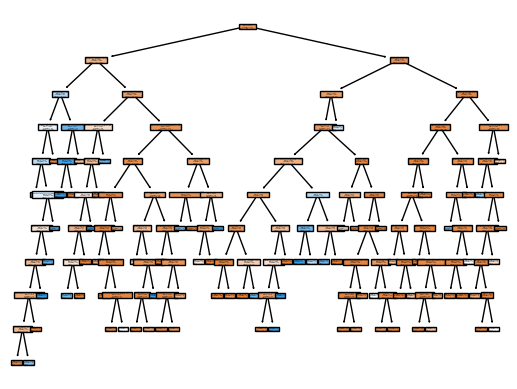

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

In [61]:
plot_tree(rf.estimators_[0], feature_names=dv.get_feature_names_out().tolist(), filled=True)
plt.show()
plt.figure(figsize=(100,100))

In [62]:
final_result['Random Forest'] = {
        'Train': roc_auc_score(Y_train, rf.predict(X_train)),
        'Test': roc_auc_score(Y_test, rf.predict(X_test)),
    }

# XGBOOST

In [63]:
from xgboost import XGBClassifier

In [64]:
xgb = XGBClassifier()

In [65]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [66]:
evaluate(xgb, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[978   0]
 [  0 198]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    978.0  198.0       1.0     1176.0        1176.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[245  10]
 [ 27  12]]
ACCURACY SCORE:
0.8741
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.900735   0.545455   0.87415    0.723095      0.853606
recall       0.960784   0.307692   0.87415    0.634238      0.874150
f1-score     0.929791   0.393443   0.87415    0.661617      0.858643
support    255.000000  39.000000   0.87415  294.000000    294.000000


In [67]:
xgb = XGBClassifier(
    learning_rate=0.05,
    max_depth=4,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    reg_alpha=0.5
)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [68]:
evaluate(xgb, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[977   1]
 [ 32 166]]
ACCURACY SCORE:
0.9719
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.968285    0.994012  0.971939     0.981149      0.972617
recall       0.998978    0.838384  0.971939     0.918681      0.971939
f1-score     0.983392    0.909589  0.971939     0.946491      0.970966
support    978.000000  198.000000  0.971939  1176.000000   1176.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[251   4]
 [ 28  11]]
ACCURACY SCORE:
0.8912
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.899642   0.733333  0.891156    0.816487      0.877580
recall       0.984314   0.282051  0.891156    0.633183      0.891156
f1-score     0.940075   0.407407  0.891156    0.673741      0.869415
support    255.000000  39.000000  0.891156  294.000000    294.000000


In [69]:
final_result['XGboost'] = {
        'Train' : roc_auc_score(Y_train , xgb.predict(X_train)),
        'Test' : roc_auc_score(Y_test , xgb.predict(X_test)),
}

# Support Vector Machine

In [70]:
svm = SVC()
svm.fit(X_train_std, Y_train)

SVC()

In [71]:
evaluate(svm, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[978   0]
 [198   0]]
ACCURACY SCORE:
0.8316
CLASSIFICATION REPORT:
                    0      1  accuracy    macro avg  weighted avg
precision    0.831633    0.0  0.831633     0.415816      0.691613
recall       1.000000    0.0  0.831633     0.500000      0.831633
f1-score     0.908078    0.0  0.831633     0.454039      0.755187
support    978.000000  198.0  0.831633  1176.000000   1176.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[255   0]
 [ 39   0]]
ACCURACY SCORE:
0.8673
CLASSIFICATION REPORT:
                    0     1  accuracy   macro avg  weighted avg
precision    0.867347   0.0  0.867347    0.433673      0.752291
recall       1.000000   0.0  0.867347    0.500000      0.867347
f1-score     0.928962   0.0  0.867347    0.464481      0.805732
support    255.000000  39.0  0.867347  294.000000    294.000000


c:\Users\Ayush\anaconda3\envs\ds_genai\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\ds_genai\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayush\anaconda3\envs\ds_genai\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [72]:
parameter = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

In [73]:
search = GridSearchCV(svm, param_grid=parameter, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [74]:
svm = SVC(**search.best_params_)
svm.fit(X_train_std, Y_train)

SVC(C=1000, gamma=0.0001)

In [75]:
evaluate(svm, X_train_std, X_test_std, Y_train, Y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[954  24]
 [ 92 106]]
ACCURACY SCORE:
0.9014
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.912046    0.815385  0.901361     0.863715      0.895771
recall       0.975460    0.535354  0.901361     0.755407      0.901361
f1-score     0.942688    0.646341  0.901361     0.794515      0.892793
support    978.000000  198.000000  0.901361  1176.000000   1176.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[241  14]
 [ 19  20]]
ACCURACY SCORE:
0.8878
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.926923   0.588235  0.887755    0.757579      0.881995
recall       0.945098   0.512821  0.887755    0.728959      0.887755
f1-score     0.935922   0.547945  0.887755    0.741934      0.884456
support    255.000000  39.000000  0.887755  294.000000    294.000000


In [76]:
final_result['SVM'] = {
        'Train': roc_auc_score(Y_train, svm.predict(X_train_std)),
        'Test': roc_auc_score(Y_test, svm.predict(X_test_std)),
}

In [77]:
final_result

{'Logistic Regression': {'Train': np.float64(0.5897936419408812),
  'Test': np.float64(0.539366515837104)},
 'Random Forest': {'Train': np.float64(0.7929292929292929),
  'Test': np.float64(0.5582202111613876)},
 'XGboost': {'Train': np.float64(0.9186806717481564),
  'Test': np.float64(0.633182503770739)},
 'SVM': {'Train': np.float64(0.7554068290264611),
  'Test': np.float64(0.7289592760180994)}}

# comparing Model Performance

In [78]:
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'XGboost': xgb,
    'SVM': svm
}

In [79]:
for m in models:
    print(f"{m.upper()} :  roc_auc_score = {roc_auc_score(Y_test, models[m].predict(X_test_std if m=='SVM' or m=='Logistic Regression' else X_test)):.4f}")

LOGISTIC REGRESSION :  roc_auc_score = 0.7083
RANDOM FOREST :  roc_auc_score = 0.5582
XGBOOST :  roc_auc_score = 0.6332
SVM :  roc_auc_score = 0.7290


In [80]:
for m in models:
    y_pred = models[m].predict(X_test_std if m=='SVM' or m=='Logistic Regression' else X_test)
    rounded_rmse = root_mean_squared_error(Y_test, y_pred)
    print(f"{m.upper()} :  RMSE = {rounded_rmse:.7f}")

LOGISTIC REGRESSION :  RMSE = 0.3595159
RANDOM FOREST :  RMSE = 0.3547539
XGBOOST :  RMSE = 0.3299144
SVM :  RMSE = 0.3350297


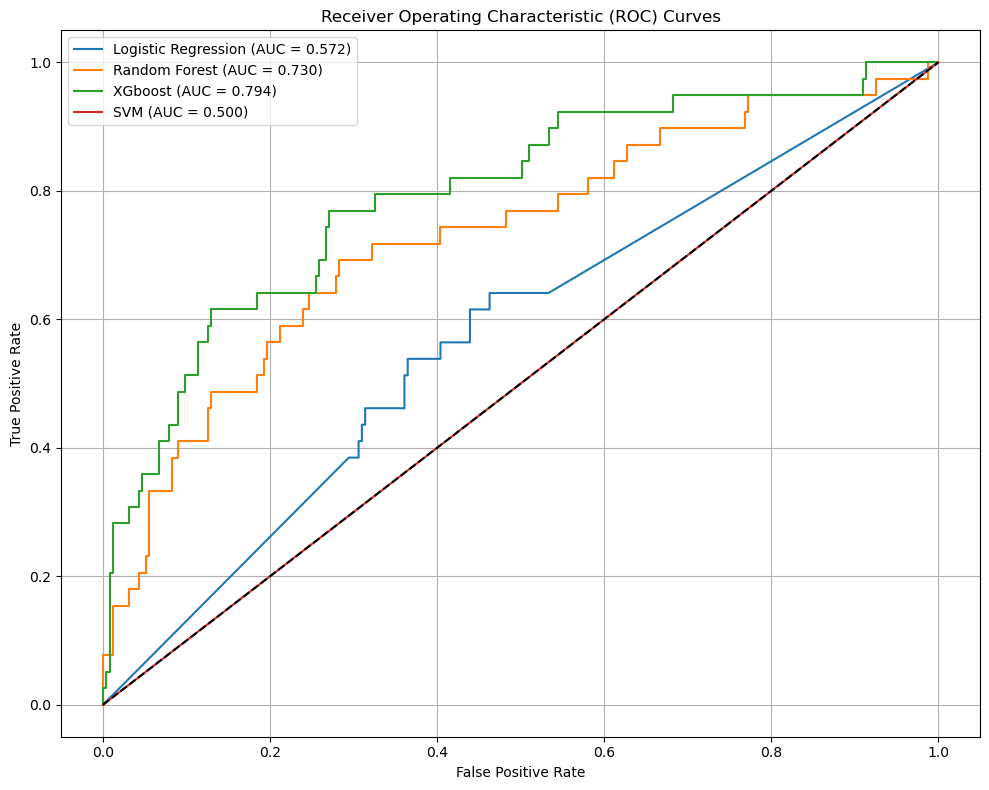

In [81]:
R = []
plt.figure(figsize=(10, 8))


for model_name, model in models.items():
    if hasattr(model, "predict_proba"):  
       
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        
        y_pred_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict(X_test)
    
    
    fpr, tpr, _ = roc_curve(Y_test, y_pred_prob)
    
   
    auc_score = roc_auc_score(Y_test, y_pred_prob)
    
    R.append((fpr, tpr, model_name, auc_score))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()

In [82]:
R_df = pd.DataFrame(R, columns=['FPR', 'TPR', 'Model', 'AUC']).sort_values(by='AUC', ascending=False)
R_df

,FPR,TPR,Model,AUC
2,"[0.0, 0.0, 0.00392156862745098, 0.003921568627...","[0.0, 0.02564102564102564, 0.02564102564102564...",XGboost,0.794369
1,"[0.0, 0.0, 0.0, 0.011764705882352941, 0.011764...","[0.0, 0.02564102564102564, 0.07692307692307693...",Random Forest,0.729713
0,"[0.0, 0.29411764705882354, 0.3058823529411765,...","[0.0, 0.38461538461538464, 0.38461538461538464...",Logistic Regression,0.571795
3,"[0.0, 1.0]","[0.0, 1.0]",SVM,0.500000


In [83]:
final_result

{'Logistic Regression': {'Train': np.float64(0.5897936419408812),
  'Test': np.float64(0.539366515837104)},
 'Random Forest': {'Train': np.float64(0.7929292929292929),
  'Test': np.float64(0.5582202111613876)},
 'XGboost': {'Train': np.float64(0.9186806717481564),
  'Test': np.float64(0.633182503770739)},
 'SVM': {'Train': np.float64(0.7554068290264611),
  'Test': np.float64(0.7289592760180994)}}

In [84]:
summary = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'Logistic Regression', 'SVM'],
    'AUC': [0.794, 0.730, 0.572, 0.500],
    'Interpretation': [
        'Best overall; strong separation power',
        'Good, slightly overfit',
        'Underfitting; linear boundary too simple',
        'Random guessing; check scaling or kernel'
    ]
})

summary.style.background_gradient(cmap='viridis', subset=['AUC'])

,Model,AUC,Interpretation
0,XGBoost,0.794000,Best overall; strong separation power
1,Random Forest,0.730000,"Good, slightly overfit"
2,Logistic Regression,0.572000,Underfitting; linear boundary too simple
3,SVM,0.500000,Random guessing; check scaling or kernel


C:\Users\Ayush\AppData\Local\Temp\ipykernel_19872\3138968560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AUC', y='Model', data=summary, palette='viridis')


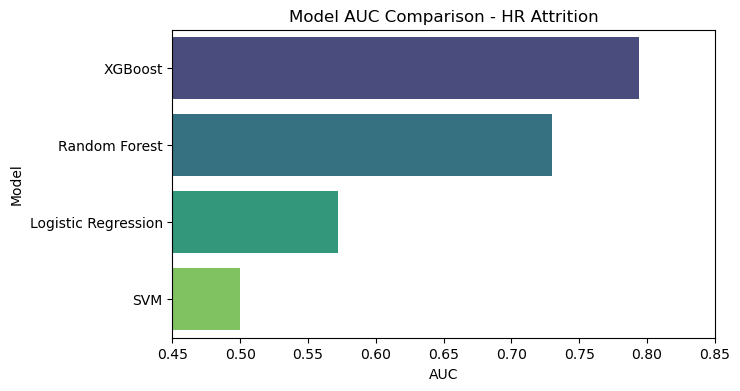

In [85]:
plt.figure(figsize=(7,4))
sns.barplot(x='AUC', y='Model', data=summary, palette='viridis')
plt.title('Model AUC Comparison - HR Attrition')
plt.xlim(0.45, 0.85)
plt.show()


In [87]:
with open("model.pkl","wb") as f:
    pickle.dump(xgb,f)